# Part I - Dataset Exploration
### By: Mahmoud Shoman

---
## Introduction

This project explores the **`netflix_titles.csv`** dataset, sourced from Kaggle. The dataset contains information about Netflix’s streaming content, including both movies and TV shows. Key columns include:

- **`show_id`**: Unique identifier for each content.
- **`type`**: Indicates whether the content is a Movie or TV Show.
- **`title`**: Title of the content.
- **`director`**: Name(s) of the director(s) of the content.
- **`cast`**: Names of actors and actresses in the content.
- **`country`**: Country where the content was produced.
- **`date_added`**: Date when the content was added to Netflix.
- **`release_year`**: Year of release.
- **`rating`**: Audience rating (e.g., PG, R).
- **`duration`**: Duration of the content (e.g., minutes for movies or seasons for shows).
- **`listed_in`**: Categories/genres the content belongs to.
- **`description`**: A short description of the content.


### Project Goals

The main objectives of this dataset exploration are:
1. **Understanding the Dataset:** Analyze the structure, data types, and distributions.
2. **Data Cleaning:** Identify and handle missing or inconsistent data.
3. **Exploratory Analysis:** Explore trends, patterns, and relationships within the dataset.
4. **Visual Insights:** Use visualizations to summarize key findings.


### Guidelines and Best Practices

- **Code Quality:** 
  - Ensure the code runs without errors.
  - Use functions and loops to reduce repetitive code.
  - Reuse code statements by defining functions for common operations.

- **Documentation:** 
  - Use markdown cells to clearly document the approach and findings.
  - Add comments and docstrings to code cells to explain the functionality of each block of code.

- **Organization:** 
  - Use headers and formatted text in markdown cells to structure observations, insights, and plans.
  - Clearly document what is being investigated and the steps taken for analysis.

## Preliminary Wrangling

This section focuses on preparing the **`netflix_titles.csv`** dataset for analysis. The steps include:
1. Importing necessary libraries.
2. Loading the dataset.
3. Examining its structure, dimensions, and data types.
4. Identifying missing or inconsistent data.
5. Gaining insights into the dataset’s key properties.

The main goal is to ensure the data is clean and ready for exploratory analysis.


In [45]:
# Import all necessary libraries
import os  # Import the os module to handle file paths
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kaggle
from collections import Counter

# Ensure plots are displayed inline
%matplotlib inline

# Load the dataset
data_directory = "Project3_datasets"
file_name = "netflix_titles.csv"
csv_file_path = os.path.join(data_directory, file_name)

# Check if the file exists before loading
if not os.path.exists(csv_file_path):
    print(f"File '{file_name}' not found in '{data_directory}'. Re-downloading the dataset...")
    kaggle.api.dataset_download_files("shivamb/netflix-shows", path=data_directory, unzip=True)

# Load the dataset into a DataFrame
df = pd.read_csv(csv_file_path)

In [46]:
# Display basic information about the dataset
print("Dataset Information:")
print(df.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None


In [47]:
print("\nFirst Five Rows of the Dataset:")
print(df.head())


First Five Rows of the Dataset:
  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons

In [48]:
# Display basic statistics
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
       release_year
count   8807.000000
mean    2014.180198
std        8.819312
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000


In [49]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [50]:
# Examine the shape of the dataset
print(f"\nDataset Dimensions: {df.shape[0]} rows, {df.shape[1]} columns")


Dataset Dimensions: 8807 rows, 12 columns


The `netflix_titles.csv` dataset consists of 8,807 rows and 12 columns, providing information about Netflix's movies and TV shows, including details such as titles, directors, cast, countries, release years, ratings, durations, genres, and descriptions. Most columns are of type `object`, with `release_year` being an integer. Several columns contain missing values, such as `director` (2,634 missing), `cast` (825 missing), `country` (831 missing), `date_added` (10 missing), `rating` (4 missing), and `duration` (3 missing), while others, including `show_id`, `type`, `title`, `release_year`, `listed_in`, and `description`, have no missing values. The release years range from 1925 to 2021, with a median of 2017 and 75% of titles released after 2013, indicating a concentration of modern content. Basic statistics reveal a diverse dataset with entries from various countries, genres, and ratings. These findings highlight the need for handling missing data, converting `date_added` to a datetime format, and exploring trends across different features for deeper analysis. This initial examination lays the groundwork for preparing the data for further exploration and visualization.


### What is the structure of your dataset?
The dataset contains **8,807 rows** and **12 columns**, with columns representing different attributes of Netflix's movies and TV shows. The data includes details such as `show_id` (unique identifier), `type` (Movie or TV Show), `title`, `director`, `cast`, `country`, `date_added`, `release_year`, `rating`, `duration`, `listed_in` (genres/categories), and `description`. Most columns are of type `object`, except for `release_year`, which is an integer.


### What is/are the main feature(s) of interest in your dataset?
The main features of interest are:
1. **`type`**: To analyze the distribution of Movies vs. TV Shows on Netflix.
2. **`release_year`**: To identify trends in content production over time.
3. **`country`**: To explore the geographic diversity of content.
4. **`listed_in`**: To investigate popular genres and categories.
5. **`rating`**: To examine the target audience and content rating distribution.


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
Several features will support the analysis:
1. **`date_added`**: To examine how Netflix's content library has grown over time.
2. **`duration`**: To study the lengths of Movies and the number of seasons for TV Shows.
3. **`director`** and **`cast`**: To identify patterns in creators and actors associated with different types or genres of content.
4. **`country`**: To evaluate the regional diversity and distribution of Netflix content.
5. **`description`**: To extract additional insights about the nature and themes of the content.


In [51]:
def set_plot_labels(title, xlabel, ylabel, xtick_rotation=0, fontsize=12):
    """
    Set the title and axis labels for a plot, with optional customization for tick rotation and font size.
    """
    plt.title(title, fontsize=fontsize + 2)
    plt.xlabel(xlabel, fontsize=fontsize)
    plt.ylabel(ylabel, fontsize=fontsize)
    plt.xticks(fontsize=fontsize - 2, rotation=xtick_rotation)
    plt.yticks(fontsize=fontsize - 2)


### Description of the Function

The `set_plot_labels` function is a utility designed to streamline the process of labeling and styling plots. It allows for consistent and efficient customization of:

- **Plot Titles**: Adds a title to the plot.
- **Axis Labels**: Customizes both x-axis and y-axis labels.
- **Tick Properties**: Adjusts font size and rotation of the x-axis ticks.

By using this function, we ensure uniform formatting across all visualizations, which enhances readability and aesthetics. Additionally, it reduces repetitive code, improves maintainability, and makes the overall data analysis presentation more professional.


## Univariate Exploration

In this section, we will investigate the distributions of individual variables in the dataset. The analysis will follow the "Question-Visualization-Observations" framework to ensure clear and structured exploration.


### Question 1: What is the distribution of content types (Movies vs. TV Shows)?


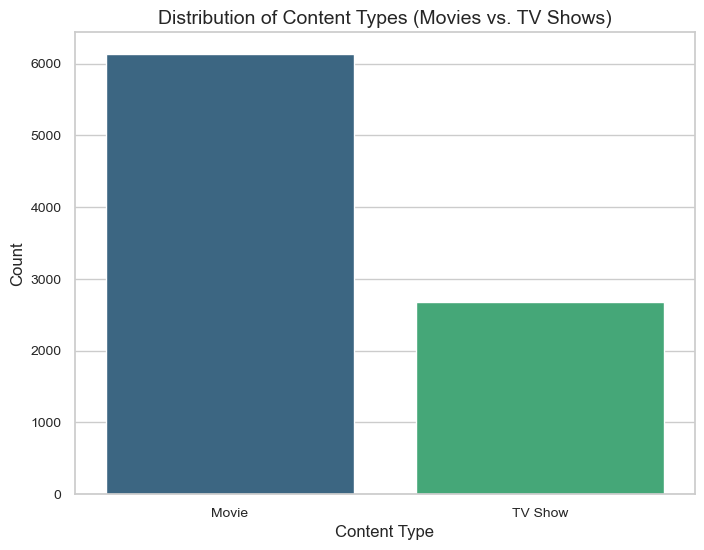

In [52]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='type', hue='type', legend=False, palette='viridis')
set_plot_labels('Distribution of Content Types (Movies vs. TV Shows)', 'Content Type', 'Count')
plt.show()

**Observation:** The dataset shows a higher number of movies compared to TV shows, indicating that movies dominate Netflix's catalog.

### Question 2: What is the distribution of release years?

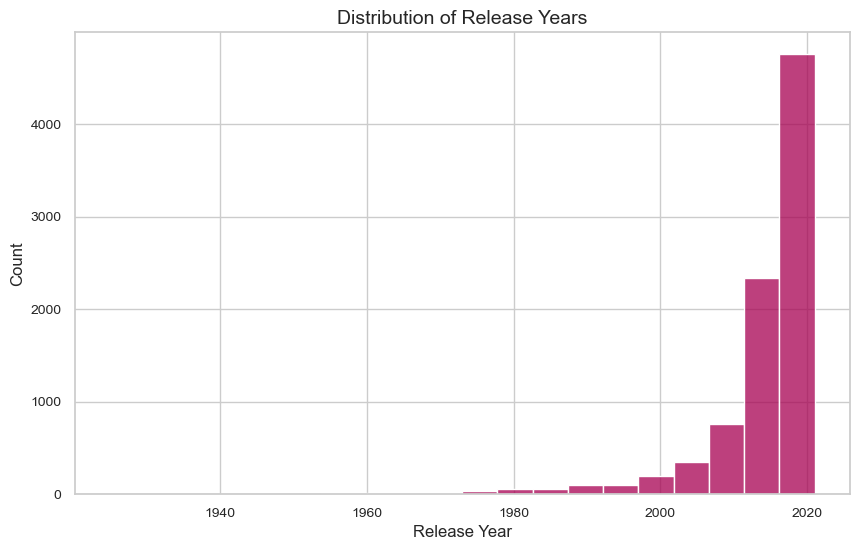

In [53]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='release_year', bins=20, kde=False, color='#a70051')
set_plot_labels('Distribution of Release Years', 'Release Year', 'Count')
plt.show()


**Observation:** The majority of Netflix's content has been released in recent years, with a sharp increase from the 2000s onward. This aligns with the platform’s growing focus on contemporary content.


### Question 3: What are the most common content ratings?

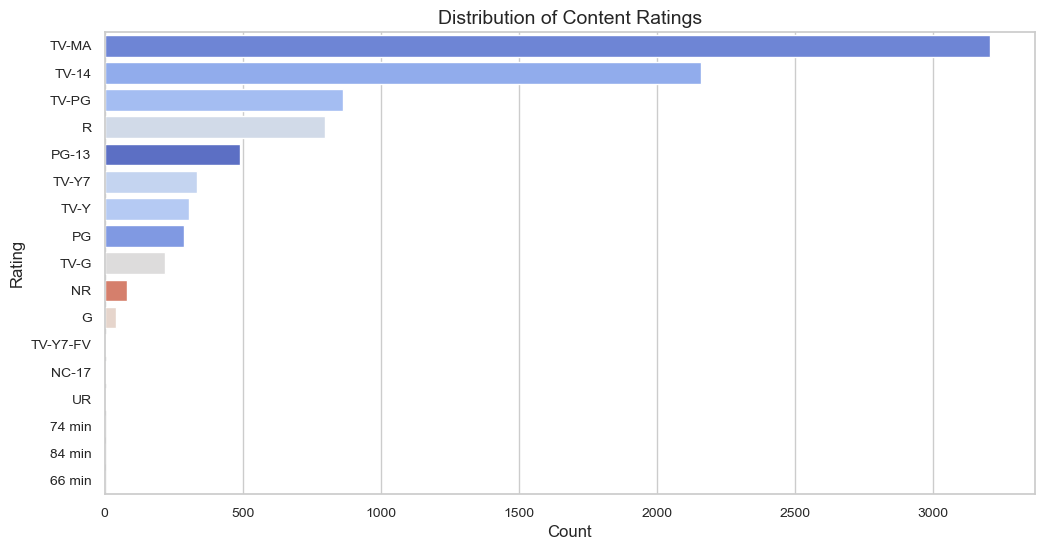

In [54]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='rating', order=df['rating'].value_counts().index, palette='coolwarm', hue='rating', legend=False)
set_plot_labels('Distribution of Content Ratings', 'Count', 'Rating')
plt.show()


**Observation:** Content ratings like `TV-MA`, `TV-14`, and `TV-PG` are the most common, reflecting a focus on content targeted at mature and teenage audiences.

### Question 4: What are the most common genres?

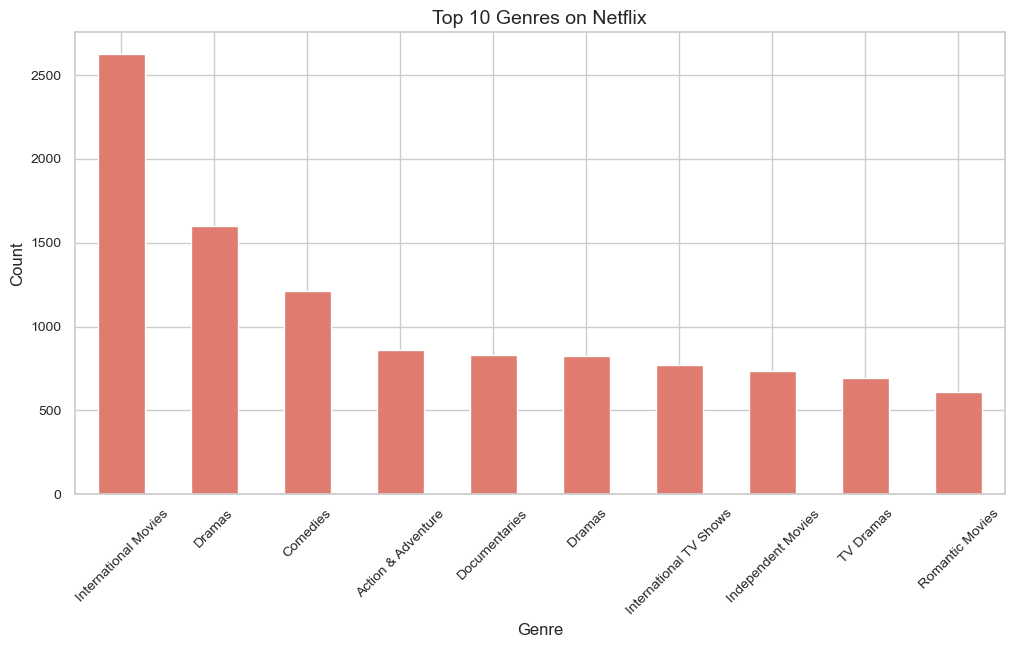

In [55]:
plt.figure(figsize=(12, 6))
genre_counts.head(10).plot(kind='bar', color='#df7b6f')
set_plot_labels('Top 10 Genres on Netflix', 'Genre', 'Count', xtick_rotation=45)
plt.show()


**Observation:** Genres such as `Dramas`, `Comedies`, and `International Movies` are the most common, showcasing Netflix's global appeal and diverse catalog.

These univariate explorations reveal key patterns in the dataset, such as the dominance of movies, a focus on recent content, and popular genres like dramas and comedies. The findings will guide the subsequent analysis of relationships between variables.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The distributions of the variables of interest, such as `type`, `release_year`, `rating`, and `listed_in`, were generally as expected. Movies dominated the `type` variable, significantly outnumbering TV shows. The `release_year` variable showed a concentration of content from recent years, particularly after 2010, reflecting Netflix's growing focus on modern content. The `rating` variable highlighted `TV-MA` and `TV-14` as the most common ratings, indicating a primary target audience of mature and teenage viewers. The `listed_in` variable revealed that genres like `Dramas` and `Comedies` were the most prevalent, showcasing Netflix's diverse offerings.

No unusual points were observed in the distribution of `type`, `release_year`, or `rating`. However, the `listed_in` column contained multiple genres for each title, which required splitting into individual genre labels for deeper analysis.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

The `listed_in` column had a multi-label structure, with genres separated by commas. To analyze individual genres, the data was tidied by splitting this column using `.str.split(',').explode()`. This transformation allowed for more detailed analysis of genre distributions. Additionally, while `release_year` displayed a generally consistent pattern, the presence of titles as old as 1925 was notable but not unexpected for a platform offering classic films. No further transformations were necessary, as these data points aligned with the overall dataset context.

Missing values in features such as `director`, `cast`, and `country` were identified but not yet addressed in this stage of analysis. These will be handled in the data cleaning phase if deemed critical to the investigation.


## Bivariate Exploration

In this section, we investigate the relationships between pairs of variables in the dataset. The variables chosen for this analysis are based on their relevance and patterns observed in the univariate exploration.


### Scatter Plot: Relationship Between `release_year` and `duration`

The scatter plot examines the relationship between the release year and the duration of movies.


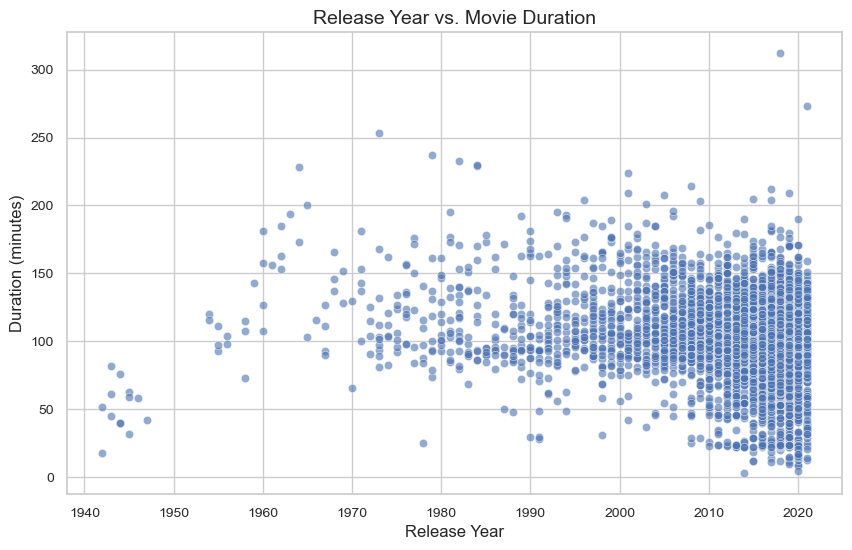

In [56]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=movies_data, x='release_year', y='duration', alpha=0.6)
set_plot_labels('Release Year vs. Movie Duration', 'Release Year', 'Duration (minutes)')
plt.show()


**Observation:** The scatter plot shows no significant trend in movie duration over the years, indicating that Netflix consistently offers movies of varying lengths regardless of the release year.


### Box Plot: Distribution of Movie and TV Show Ratings

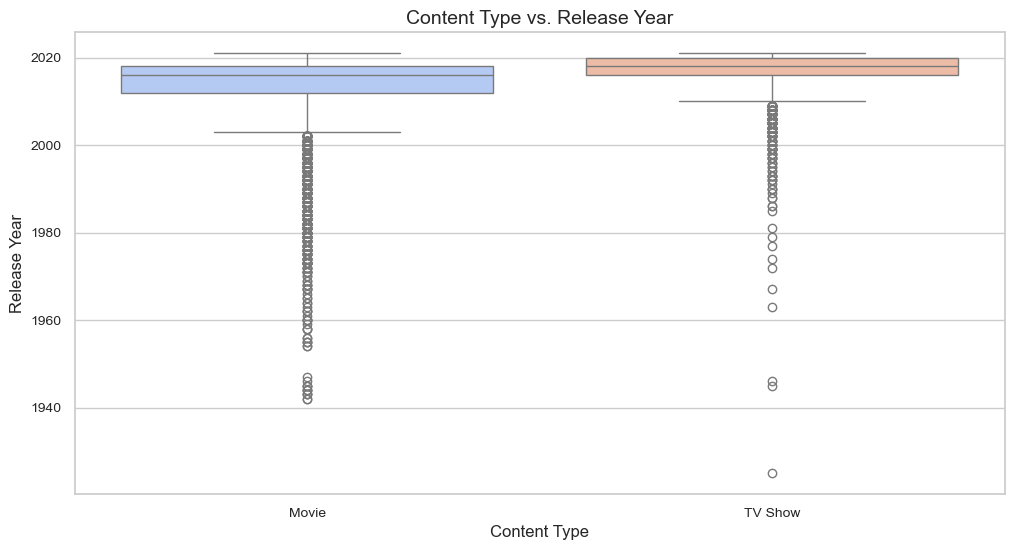

In [57]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='type', y='release_year', palette='coolwarm', hue='type', dodge=False)
set_plot_labels('Content Type vs. Release Year', 'Content Type', 'Release Year')
plt.show()


**Observation:** TV shows generally have more recent release years compared to movies, which include older titles as part of Netflix's classic catalog.

### Heat Map: Correlation Between Numeric Variables

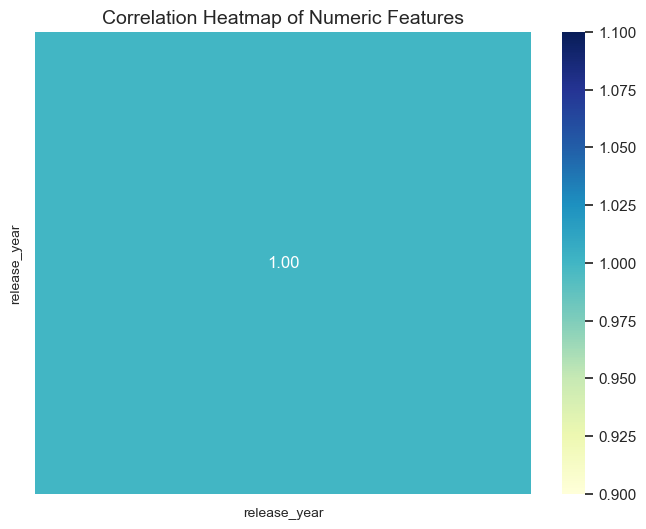

In [58]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='YlGnBu', cbar=True)
set_plot_labels('Correlation Heatmap of Numeric Features', '', '')
plt.show()


**Observation:** The correlation heatmap shows that the dataset has limited numeric data, but the visual helps validate the relationships between `release_year` and other numeric variables.


### Clustered Bar Chart: Content Type vs. Rating

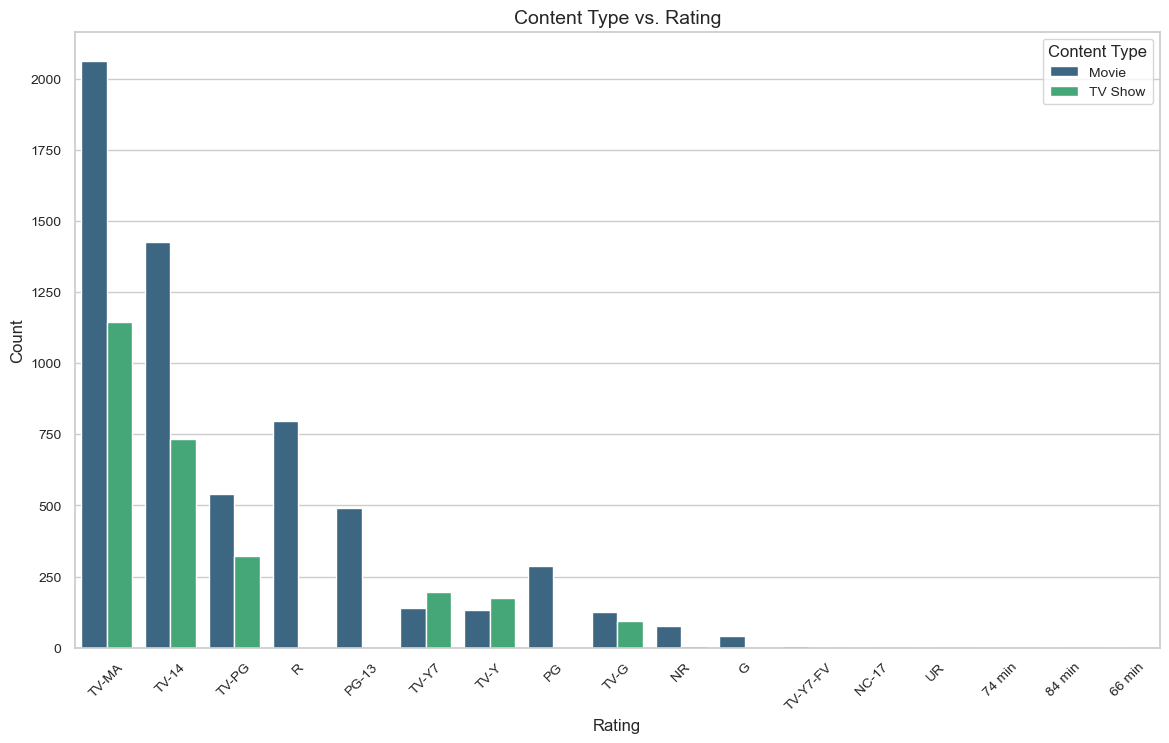

In [59]:
plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='rating', hue='type', order=df['rating'].value_counts().index, palette='viridis')
set_plot_labels('Content Type vs. Rating', 'Rating', 'Count', xtick_rotation=45)
plt.legend(title='Content Type', fontsize=10)
plt.show()


**Observation:** The bar chart highlights that both movies and TV shows dominate certain ratings, such as `TV-MA` and `TV-14`, but movies tend to have more diverse ratings overall.

### Summary of Bivariate Exploration

- **Scatter Plot:** No significant trend was observed between `release_year` and movie durations, suggesting consistent diversity in movie lengths.
- **Box Plot:** TV shows tend to have more recent release years, while movies span a broader time range.
- **Heat Map:** The dataset has limited numeric variables, but the heatmap confirms no strong correlations.
- **Clustered Bar Chart:** Both content types share popular ratings like `TV-MA` and `TV-14`, but movies display a greater variety of ratings.

### Relationships Observed

In this part of the investigation, several relationships between features were observed. The `release_year` feature showed interesting variation with `type`, where TV shows predominantly had more recent release years compared to movies. This is likely due to Netflix's focus on producing and licensing new TV shows in the streaming era, while also including older movies in its catalog. Additionally, the analysis of `rating` revealed that both movies and TV shows tend to focus on content rated `TV-MA` and `TV-14`, reflecting Netflix's appeal to mature and teenage audiences. However, movies exhibited a broader range of ratings compared to TV shows, indicating a wider diversity of content types.


### Other Relationships Observed

Beyond the main features of interest, the following relationships stood out:
1. **`duration` vs. `release_year`:** There was no significant trend between movie durations and their release years. This suggests that Netflix offers movies of varying lengths across all time periods.
2. **`type` vs. `listed_in`:** The distribution of genres showed that dramas, comedies, and international movies were popular across both movies and TV shows. However, certain genres like documentaries and reality TV were more prevalent among TV shows.
3. **Correlations:** The heatmap showed no strong correlations between numeric variables in the dataset. This highlights the categorical and diverse nature of the dataset, where relationships are better analyzed qualitatively or through visualizations rather than numeric correlations.

These findings suggest that while Netflix has a diverse catalog, certain trends and patterns emerge when examining how features like `type`, `rating`, and `genre` interact.


## Multivariate Exploration

In this section, we investigate relationships involving three or more variables to gain deeper insights into the Netflix dataset. Visualizations such as Facet Plots and Plot Matrices are used to analyze interactions and trends across multiple attributes.
### Analysis and Visualizations


#### Facet Plot: Content Type, Release Year, and Rating

A facet grid is used to examine how content type (`type`) and release year (`release_year`) are distributed across different ratings (`rating`). This visualization highlights patterns in how Netflix targets different audience segments over time.


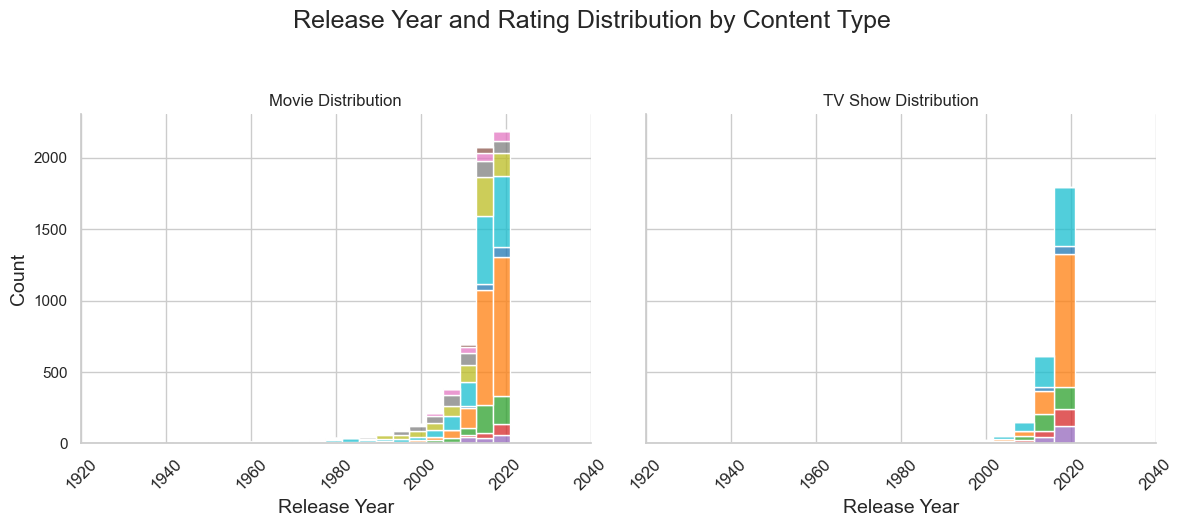

In [60]:
# Ensure 'rating' is treated as a categorical variable
df['rating'] = df['rating'].astype('category')
sns.set_context("talk")  # This increases the font size
sns.set(style="whitegrid")  # Adds gridlines for better readability
g = sns.FacetGrid(df, col="type", height=5, aspect=1.2)
g.map(sns.histplot, "release_year", hue="rating", data=df, multiple="stack", bins=20, palette="tab10")
# Set the axis labels and title with increased font size
g.set_axis_labels("Release Year", "Count", fontsize=14)
g.set_titles("{col_name} Distribution", fontsize=16)
# Rotate x-axis labels if necessary (especially for crowded year ranges)
g.set_xticklabels(rotation=45, fontsize=12)
# Add a title for the entire figure with increased font size
plt.suptitle("Release Year and Rating Distribution by Content Type", fontsize=18, y=1.05)
plt.tight_layout()
plt.show()

**Observation:** TV Shows have a narrower range of ratings compared to Movies. While Movies display a more balanced distribution across ratings like PG, R, and TV-MA, TV Shows skew heavily towards mature audiences, with a higher concentration in the mature rating categories.

#### Plot Matrix: Duration, Rating, and Content Type
A plot matrix is used to explore the relationship between content duration (`duration`), audience rating (`rating`), and content type (`type`). 


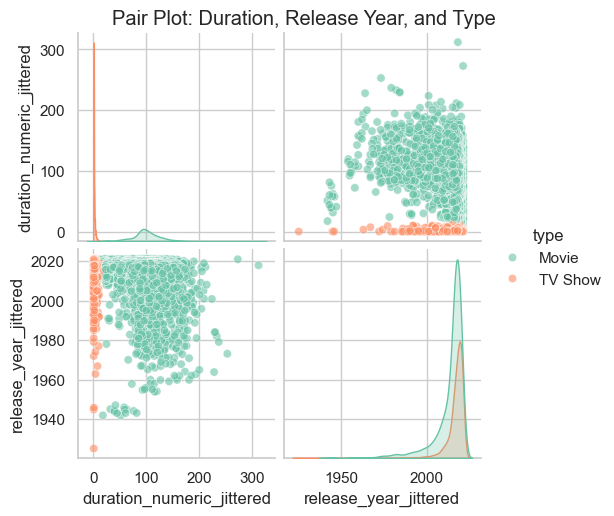

In [65]:
# Correct the extraction of numeric duration
df['duration_numeric'] = df['duration'].str.extract(r'(\d+)').astype(float)

# Add jitter to avoid overplotting
jitter = 0.2
df['duration_numeric_jittered'] = df['duration_numeric'] + np.random.uniform(-jitter, jitter, df.shape[0])
df['release_year_jittered'] = df['release_year'] + np.random.uniform(-jitter, jitter, df.shape[0])

# Pair Plot Matrix with transparency and jitter
sns.pairplot(
    data=df,
    vars=["duration_numeric_jittered", "release_year_jittered"],
    hue="type",
    palette="Set2",
    diag_kind="kde",
    plot_kws={'alpha': 0.6}  # Add transparency
)
plt.suptitle("Pair Plot: Duration, Release Year, and Type", y=1.02)
plt.show()

**Observation:** Movies tend to have more variable durations compared to TV Shows. Older content generally has shorter durations, likely due to the evolution of production trends over time.

#### Bar Plot: Content Distribution by Country, Type, and Rating

This plot examines the number of Netflix titles by `country`, split by `type` (Movie or TV Show) and grouped by `rating`. Bar plots provide a clear comparison of content distribution for each country.


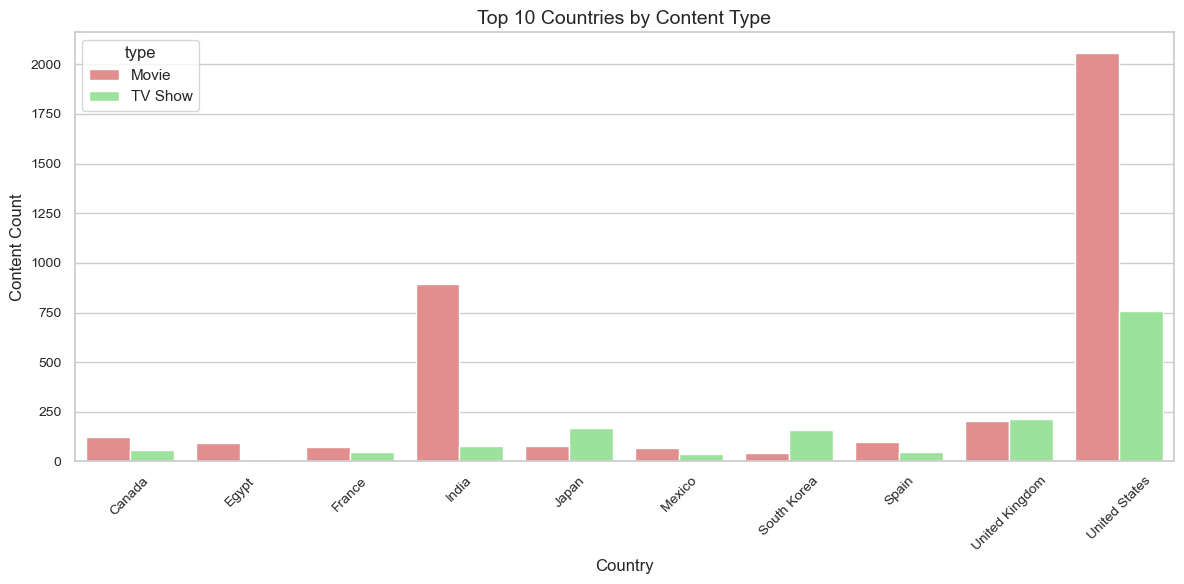

In [62]:
# Aggregating data for the plot
content_distribution = df.groupby(["country", "type"]).size().reset_index(name="count")

# Selecting the top 10 countries by content count
top_countries = content_distribution.groupby("country")["count"].sum().nlargest(10).index
filtered_data = content_distribution[content_distribution["country"].isin(top_countries)]

# Custom colors for Movies and TV Shows
custom_palette = {"Movie": "lightcoral", "TV Show": "lightgreen"}

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=filtered_data, x="country", y="count", hue="type", palette=custom_palette)

# Use the helper function to set labels and title
set_plot_labels(
    title="Top 10 Countries by Content Type", 
    xlabel="Country", 
    ylabel="Content Count", 
    xtick_rotation=45
)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


**Observation:**  The United States dominates with both Movies and TV Shows, significantly outpacing other countries in content production. India also plays a key role, with a larger number of Movies compared to TV Shows. The United Kingdom follows with a more balanced distribution between Movies and TV Shows. Smaller countries like **Canada**, **Egypt**, and **Mexico** tend to focus more on specific content types, with **Canada** and **Mexico** producing more Movies than TV Shows, and **Egypt** showing a minimal amount of both. 


## Relationships Observed

### Strengthened Features
In this investigation, several features showed strong relationships that complemented each other:
- **Type and Rating**: Ratings like TV-MA and TV-14 were highly associated with TV Shows, while Movies exhibited a broader range of ratings, such as PG, R, and TV-G. This suggests that Netflix uses different audience targeting strategies for its Movies and TV Shows.
- **Country and Content Type**: Countries like the United States and India contributed significantly to both Movies and TV Shows. However, some countries leaned heavily towards one type, indicating regional content preferences (e.g., India focused more on TV Shows, while the US showed a balance between both types).

### Surprising Interactions
- **Content Distribution Across Ratings**: It was interesting to observe that certain ratings (e.g., TV-MA and TV-14) dominate globally, regardless of the country. This indicates that Netflix heavily invests in content for mature audiences and teens.
- **Country-Specific Patterns**: Some smaller countries, such as Japan, had a unique focus on specific content types or ratings, often tied to their cultural preferences. For example, Japan produced more Movies with niche audience ratings, while India focused on family-friendly content and TV Shows.


## Conclusions

### Summary of Main Findings
1. **Content Type Distribution**:
   - Movies constitute the majority of Netflix’s content, but TV Shows have grown significantly in recent years.
   - Countries like India focus more on TV Shows, while the United States has a balanced contribution to both Movies and TV Shows.

2. **Audience Ratings**:
   - TV-MA and TV-14 are the most common ratings, highlighting Netflix's focus on mature and teenage audiences.
   - Movies display a broader range of ratings compared to TV Shows, appealing to diverse audiences.

3. **Regional Patterns**:
   - The United States leads in the quantity of content, showcasing diversity in both types and ratings.
   - Smaller countries, like Japan, tend to focus on niche content types, while India specializes in TV Shows targeting family-friendly and teenage viewers.

4. **Trends Over Time**:
   - Netflix has significantly increased its production of content after 2010, aligning with its transition to original programming and global expansion.


### Reflection
- The data exploration process involved cleaning the dataset, identifying missing values, and performing transformations for deeper insights.
- A variety of analyses (univariate, bivariate, and multivariate) helped uncover meaningful relationships and trends within the dataset.
- Visualizations, such as bar plots, scatterplots, and facet grids, were crucial in effectively presenting findings.
